<a href="https://colab.research.google.com/github/lucasllimati/Bootcamp-Data-Science-Aplicada/blob/main/04_Feriados_e_sazonalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.Entendendo a série temporal

Analisando dados de COVID com Python e Pandas
Dataset: https://www.seade.gov.br/coronavirus/


# Aula 1.3

In [1]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv(url, sep=';')

In [4]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [5]:
dados['datahora'] = pd.to_datetime(dados['datahora'],format='%Y-%m-%d')

In [6]:
import matplotlib as mpl

In [7]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [8]:
import seaborn as sns

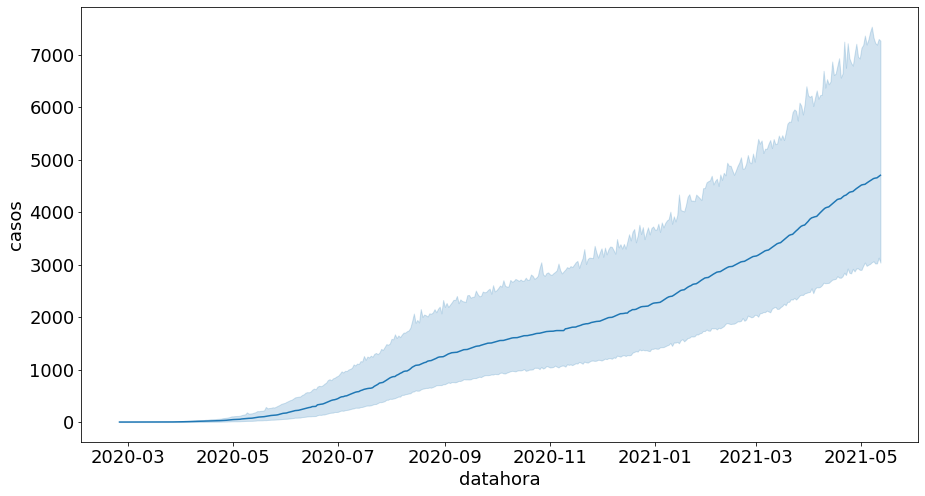

In [9]:
sns.lineplot(x='datahora', y='casos', data=dados)

$$e^x$$

In [10]:
import numpy as np

In [11]:
eixo_x = np.linspace(-2,2,100)

In [12]:
y_exp = np.exp(eixo_x)

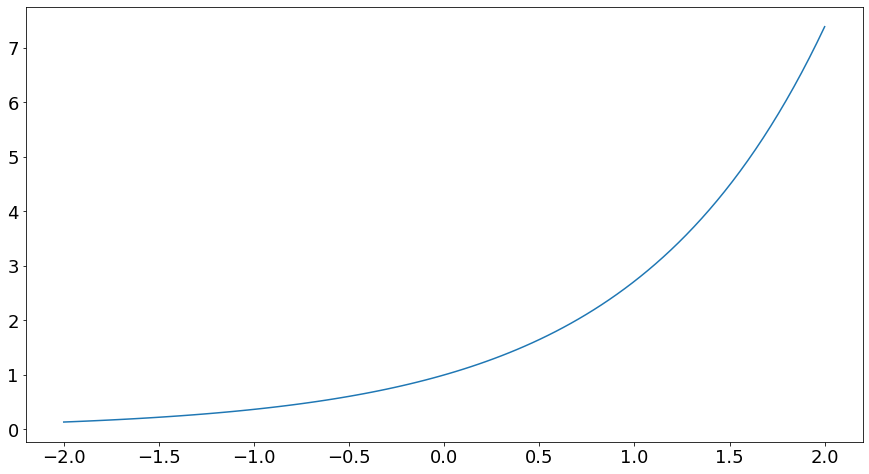

In [13]:
sns.lineplot(x=eixo_x, y=y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

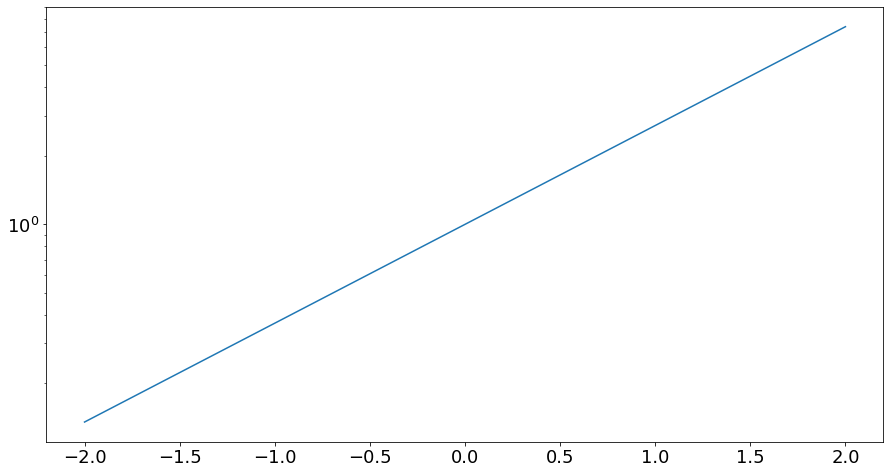

In [14]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [15]:
dados_sp = dados.query('nome_munic == "São Paulo"')

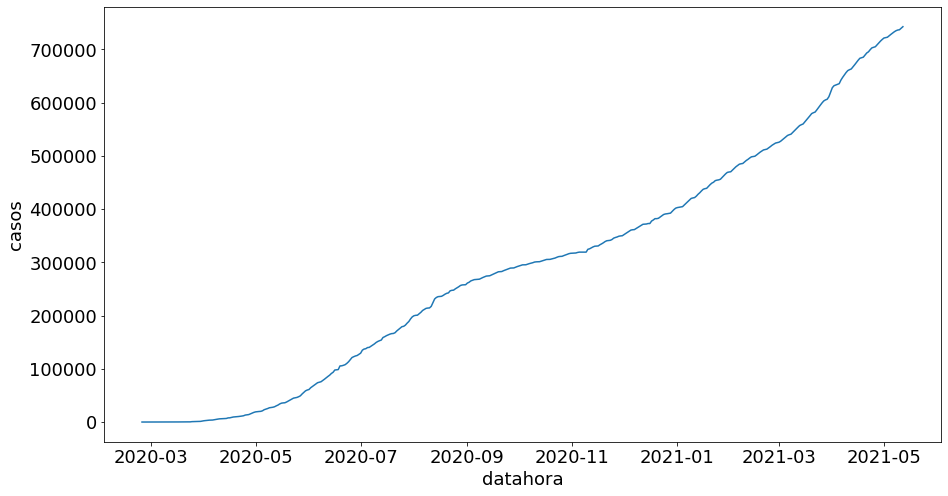

In [16]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)

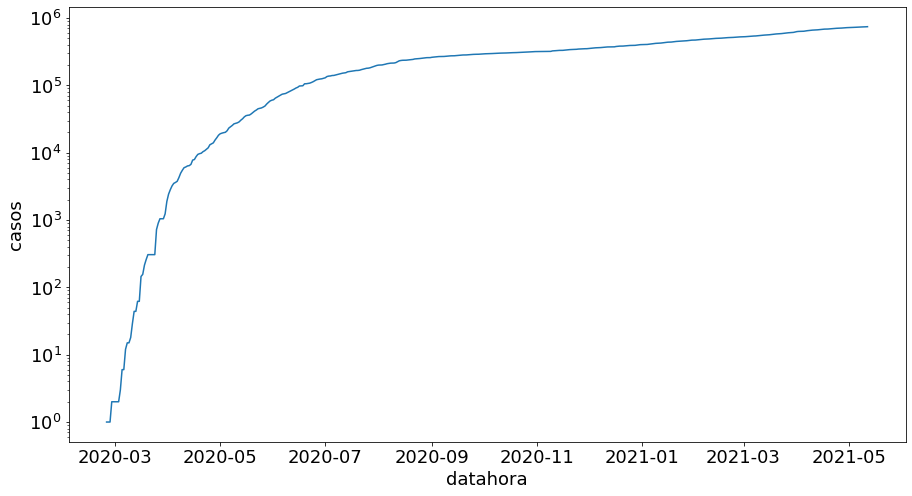

In [17]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')

## Desafio 01: Filtrar a base com alguma outra função.

## Desafio 02: Escolher outro municipio.

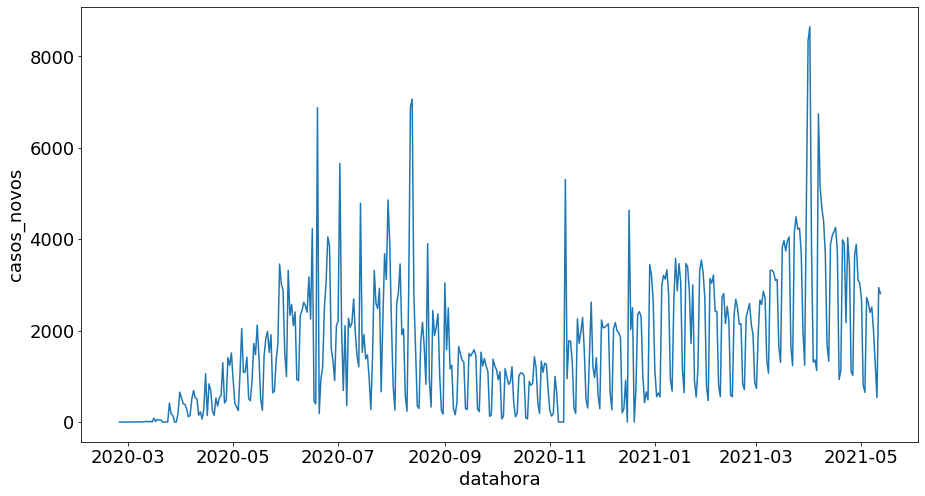

In [18]:
sns.lineplot(x='datahora', y='casos_novos', data = dados_sp)

In [19]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [20]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

In [21]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

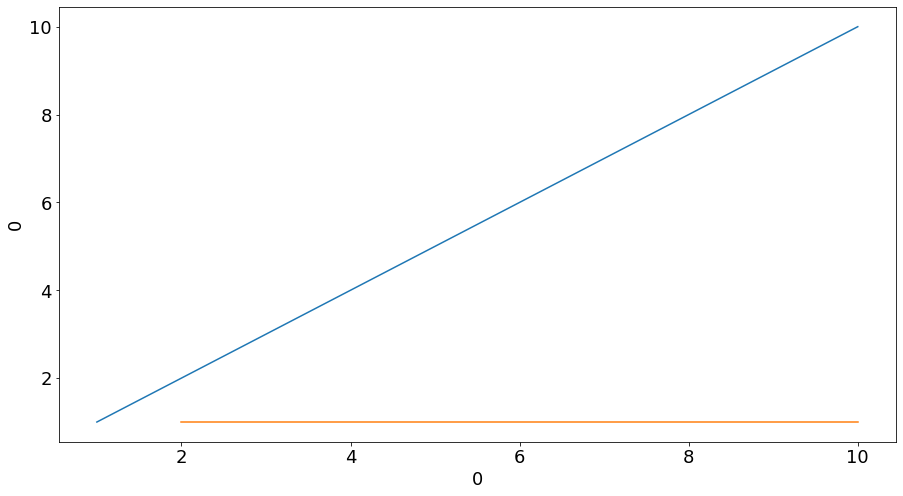

In [22]:
sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo)

$$ y = ax + b $$
$$ y = 1x + b $$

In [23]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


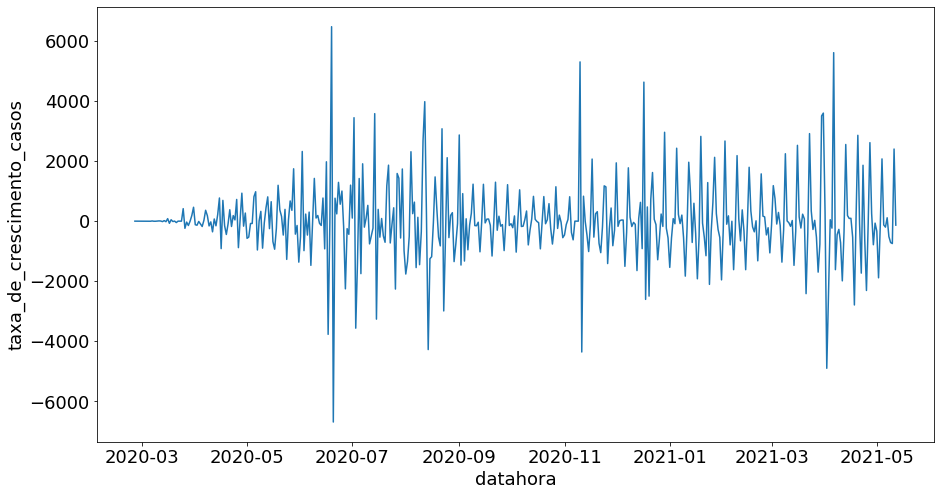

In [24]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)

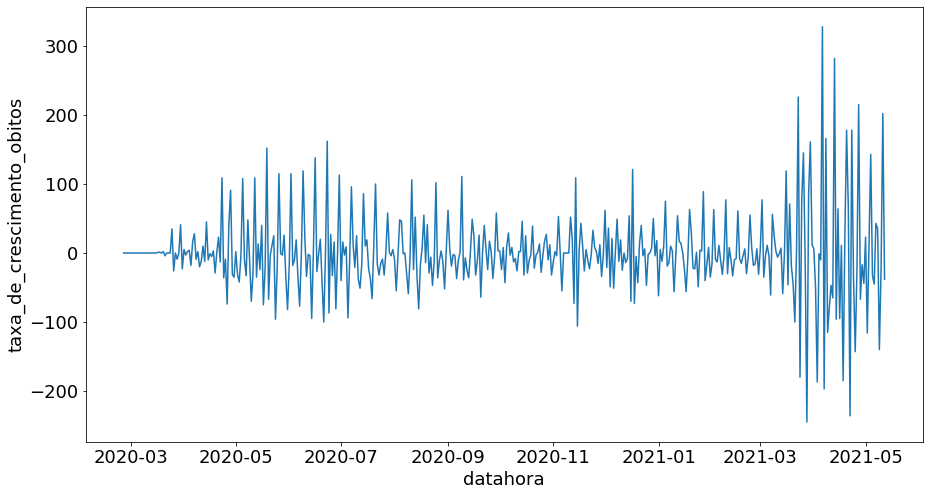

In [25]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

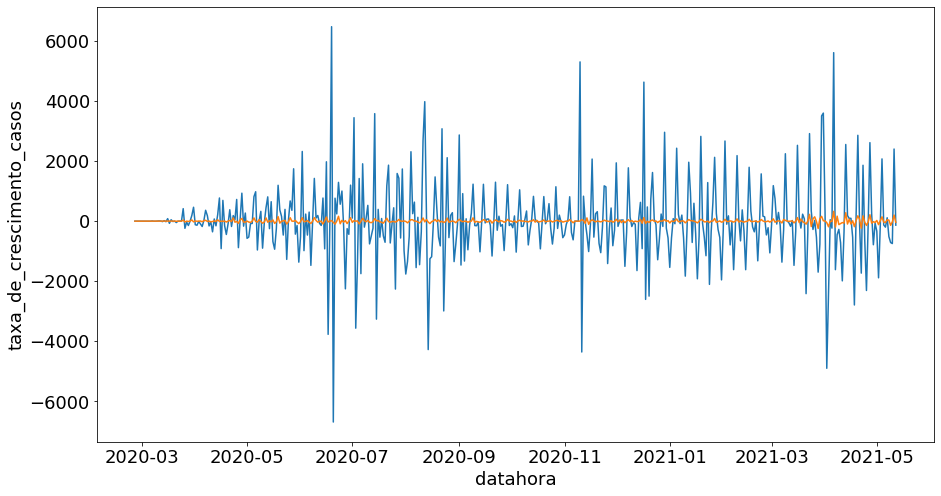

In [26]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

In [27]:
import matplotlib.pyplot as plt

<BarContainer object of 443 artists>

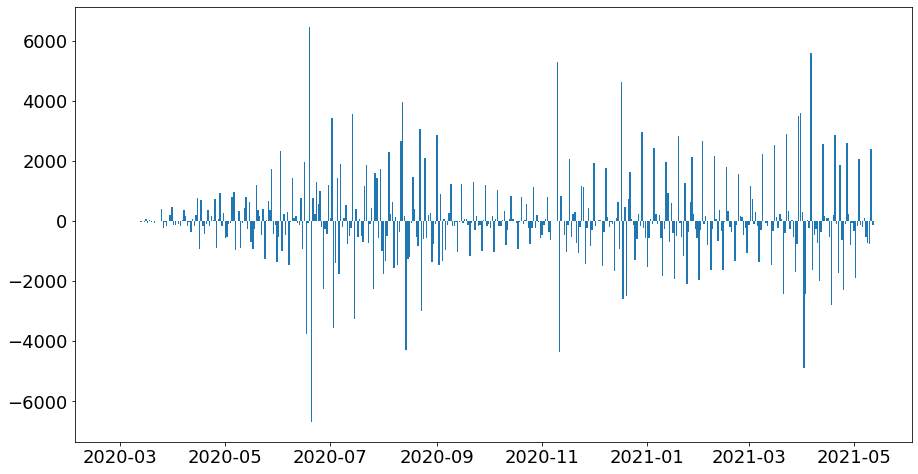

In [28]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [29]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

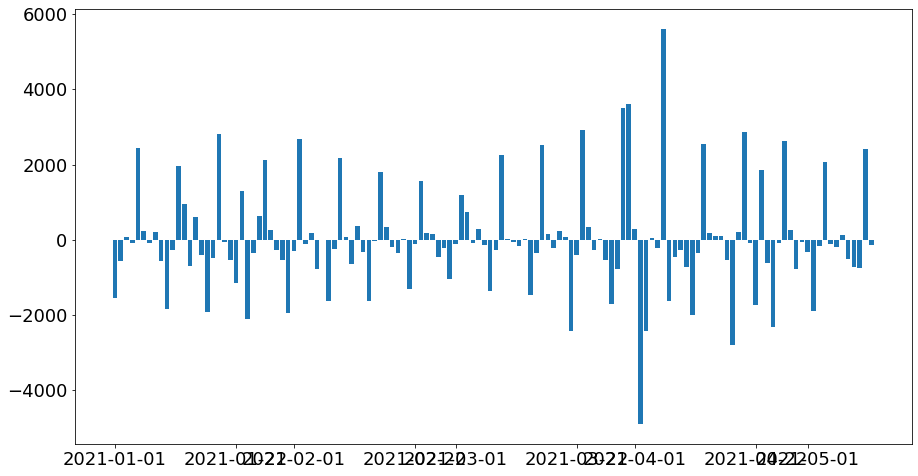

In [31]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [32]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


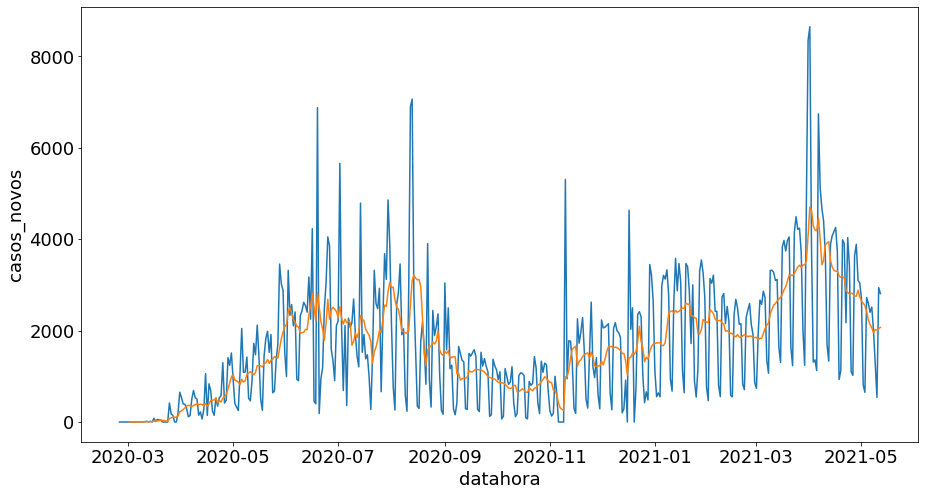

In [33]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)

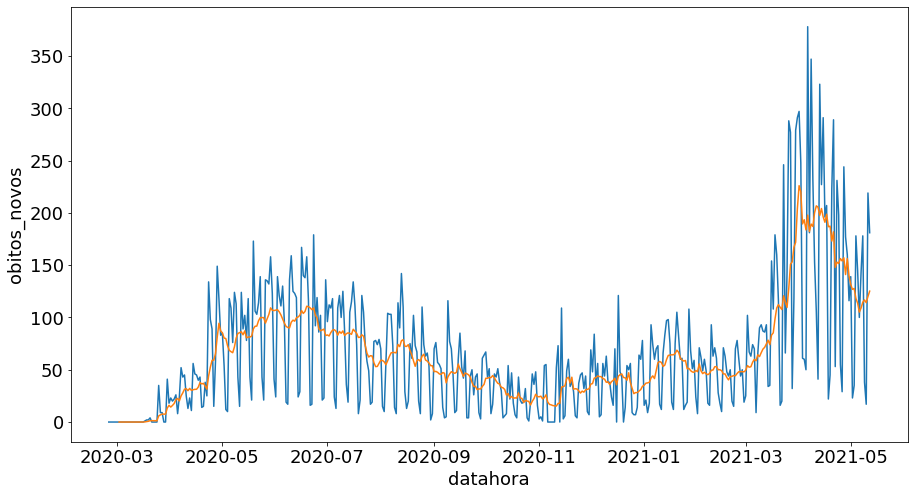

In [34]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp)

## Desafio 01: Mostrar o notebook sem os warnings

## Desafio 02: Pico da taxa de casos novos coincide com a taxa dos óbitos novos

## Desafio 03: Deixar os gráficos mais bonitos

## Desafio 04: Gerar o gráfico da média móvel do número de óbitos. Mudar os gráficos de casos de linhas para barra.

## Desafio 05: Mover o número de óbitos alguns dias e verificar o resultado no gráfico

## Desafio 06: Função de Correlação cruzada dos óbitos e casos.

## Desafio 07: Estudar outros municípios

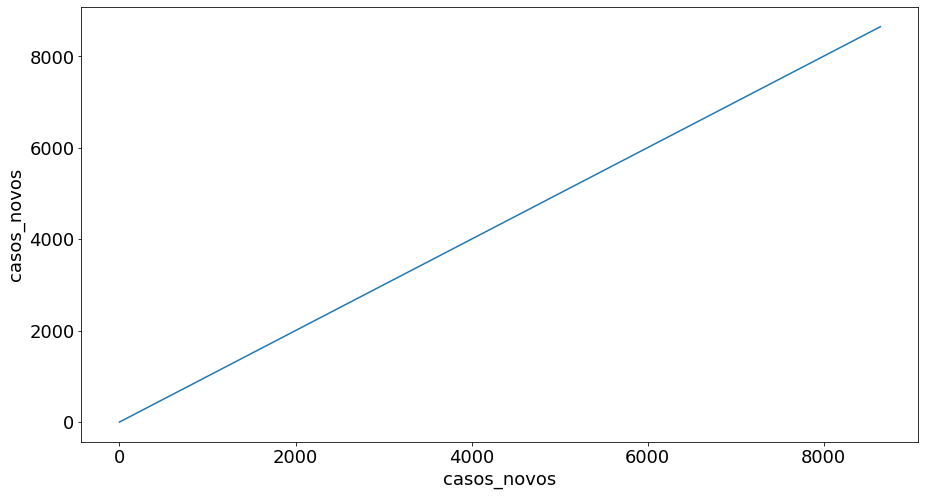

In [35]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

Correlação perfeita, pois esta positiva.

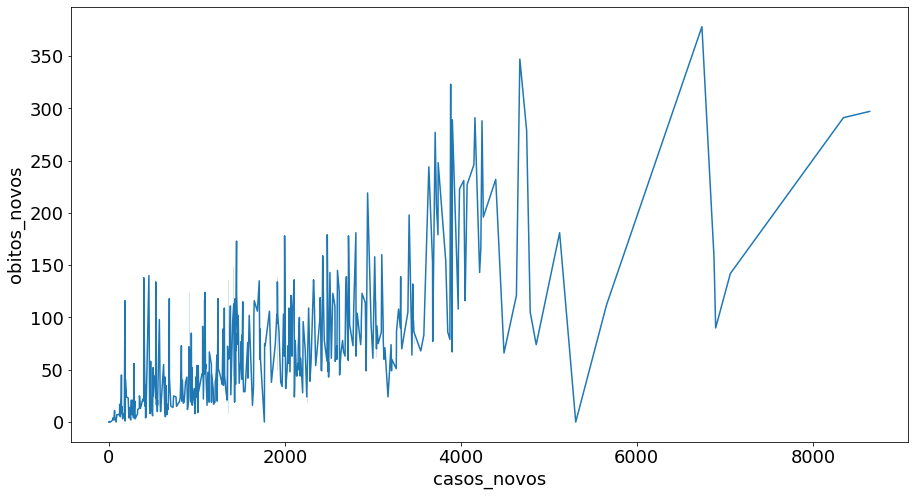

In [36]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [37]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dados_202102 = dados_sp.query('mes==2 & ano==2021')

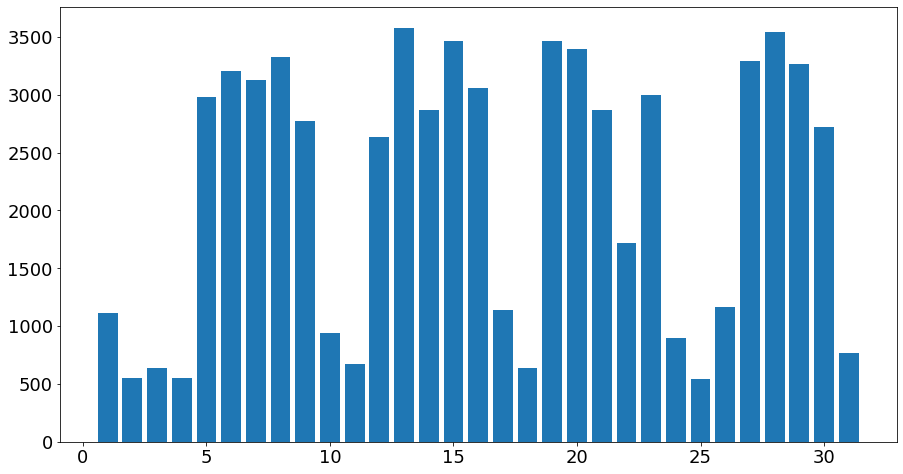

<BarContainer object of 28 artists>

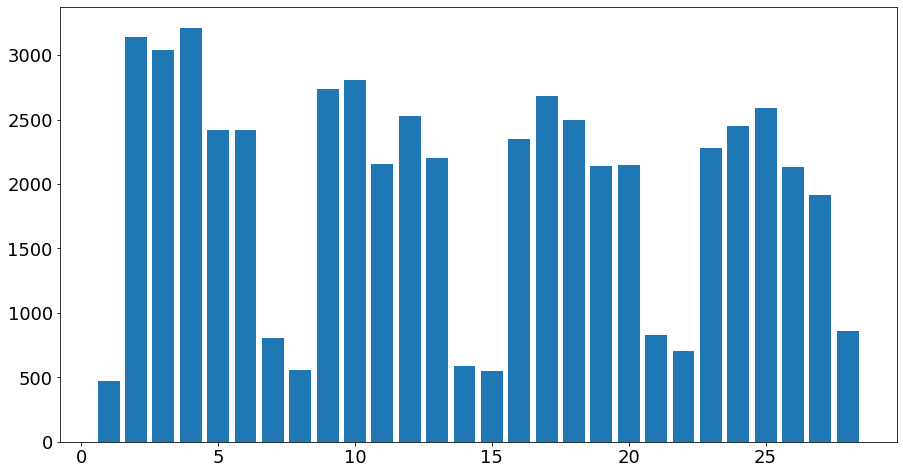

In [38]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])

In [39]:
from pandas.plotting import autocorrelation_plot

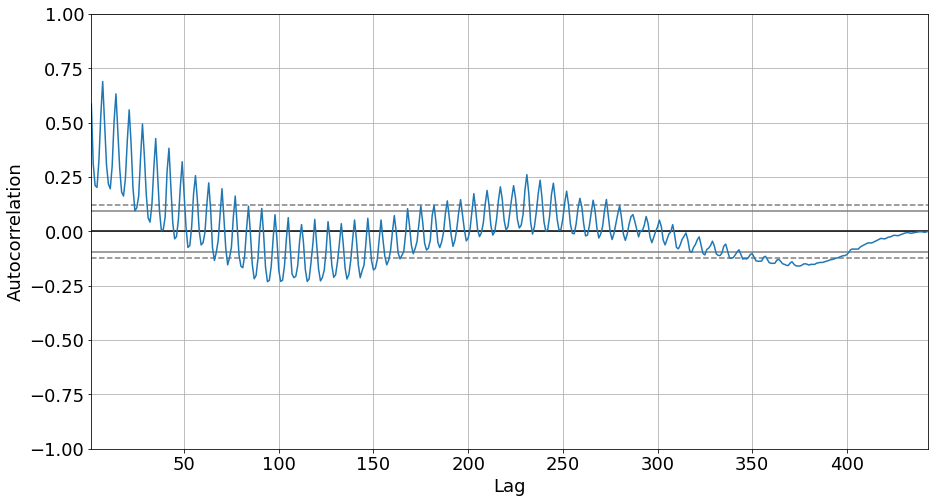

In [40]:
autocorrelation_plot(dados_sp['casos_novos'])

In [41]:
dados_sp.shape

(443, 31)

In [42]:
aleatorio = np.random.rand(443)

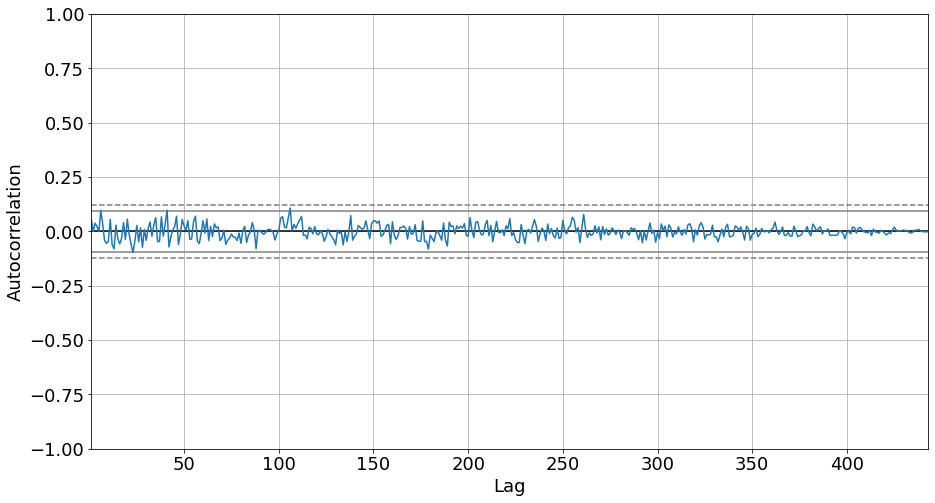

In [43]:
autocorrelation_plot(aleatorio)

# Aula 2.3

In [44]:
df = pd.DataFrame()

In [45]:
df['ds'] = dados_sp['datahora'][:400]

In [46]:
df['y'] = dados_sp['casos_novos'][:400]

In [47]:
dados_sp.shape

(443, 31)

In [48]:
df

ds     y
562    2020-02-25     0
1207   2020-02-26     0
1852   2020-02-27     0
2497   2020-02-28     1
3142   2020-02-29     0
...           ...   ...
255337 2021-03-26  4241
255982 2021-03-27  3709
256627 2021-03-28  2010
257272 2021-03-29  1242
257917 2021-03-30  4748

[400 rows x 2 columns]

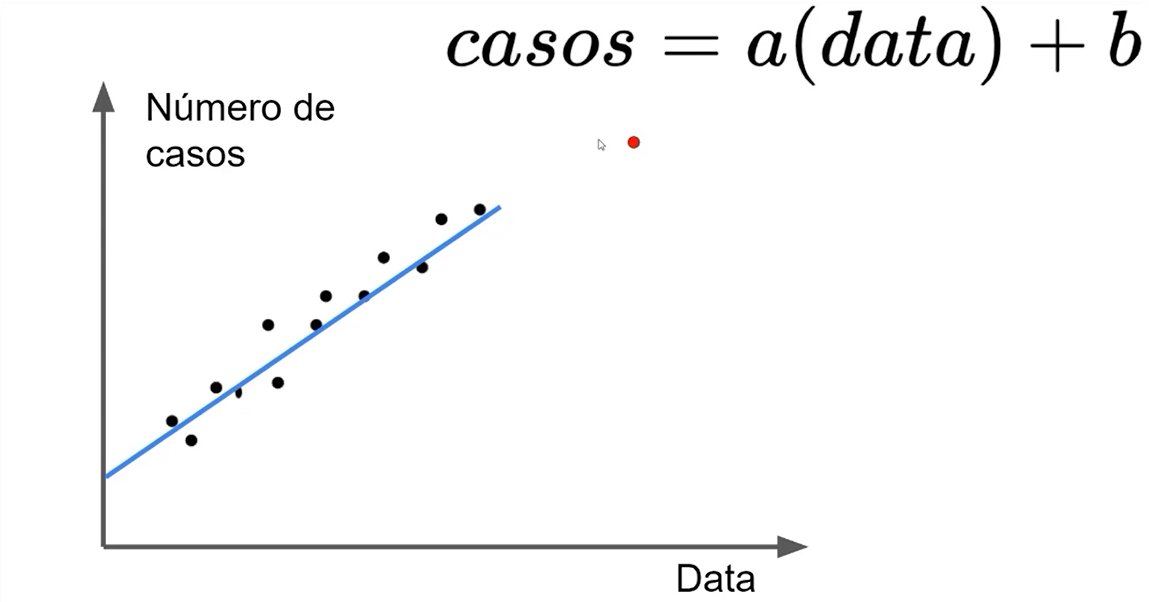

In [49]:
from fbprophet import Prophet

In [50]:
modelo = Prophet()

In [51]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [53]:
dataframefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [54]:
previsao = modelo.predict(dataframefuturo)

In [55]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -137.621348  ...                         0.0  320.078004
1 2020-02-26 -119.843618  ...                         0.0  337.016324
2 2020-02-27 -102.065887  ...                         0.0  494.014021
3 2020-02-28  -84.288157  ...                         0.0  256.493471
4 2020-02-29  -66.510426  ...                         0.0   -7.395631

[5 rows x 16 columns]

In [56]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

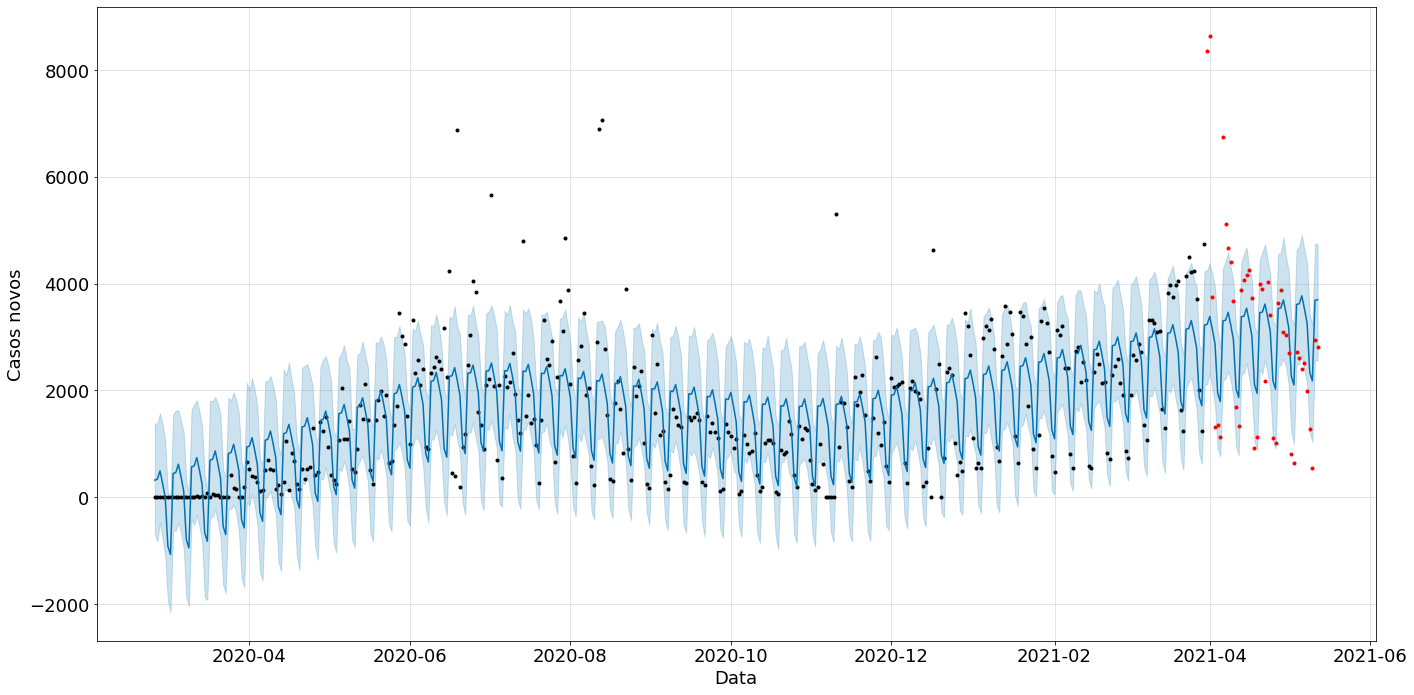

In [57]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10));
plt.plot(df_teste['ds'], df_teste['y'], '.r' )

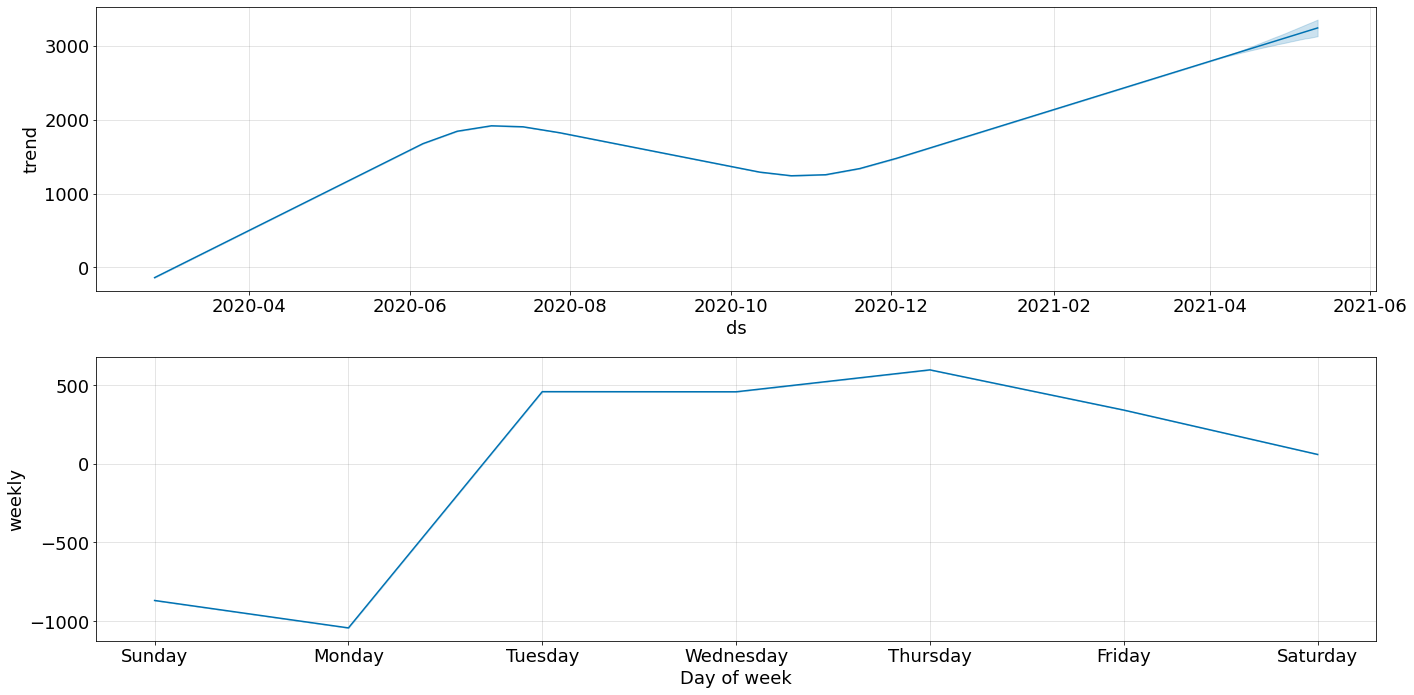

In [58]:
modelo.plot_components(previsao, figsize=(20,10));

Sazionalidade semanal

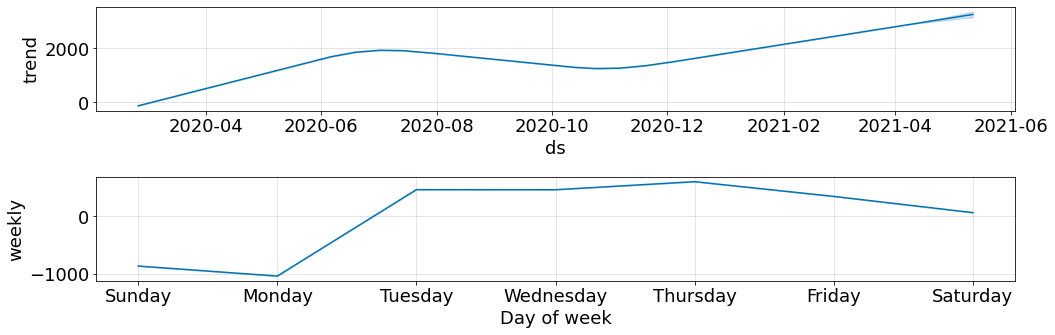

In [59]:
modelo.plot_components(previsao, figsize=(15,5));

## Desafio 08: Mudar os períodos de previsão

## Desafio 09: Explorar a documentação do Prophet

## Desafio 10: Deixar os gráficos mais bonitos

#Aula 3.3

In [60]:
from fbprophet.plot import add_changepoints_to_plot

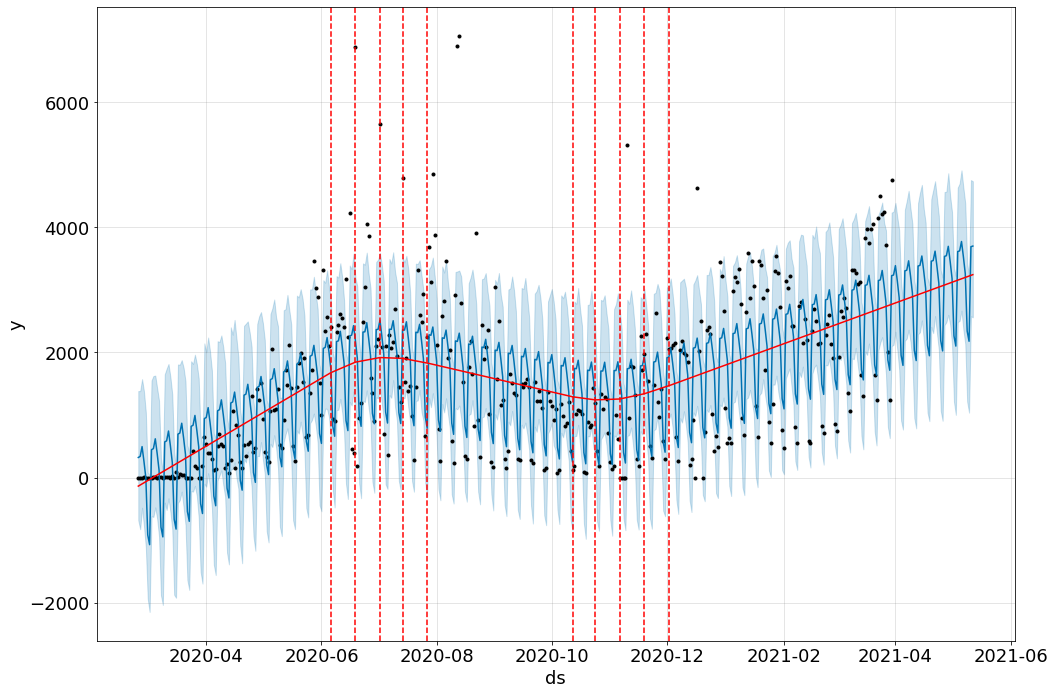

In [61]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [62]:
modelo = Prophet(n_changepoints=50)

In [63]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [65]:
previsao = modelo.predict(dataframefuturo)

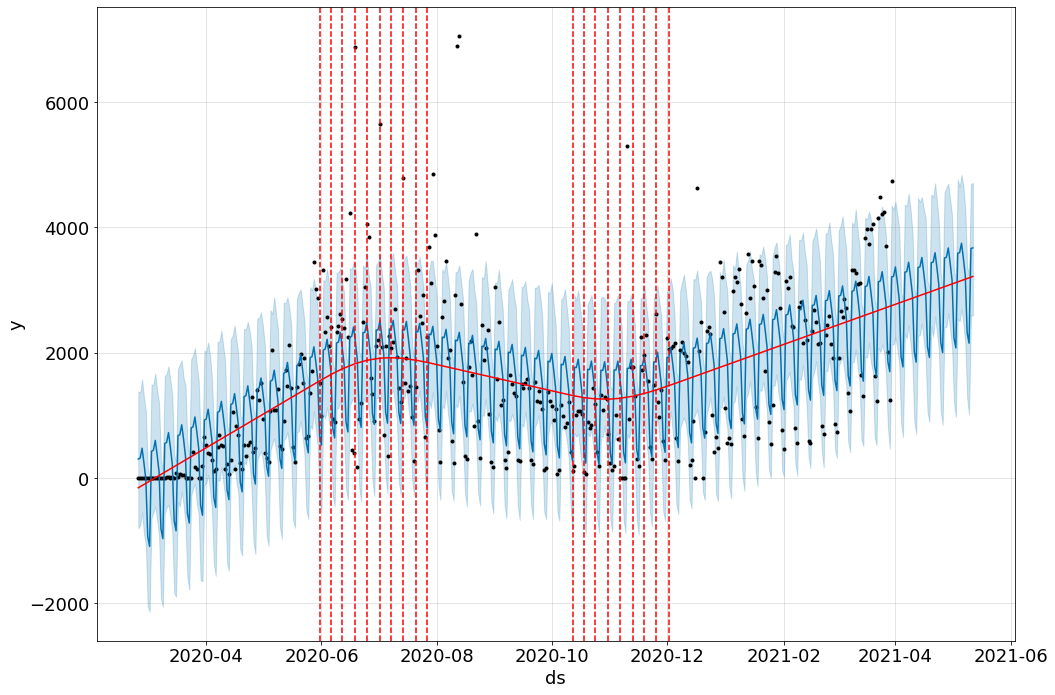

In [66]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [67]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)

In [68]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [70]:
previsao = modelo.predict(dataframefuturo)

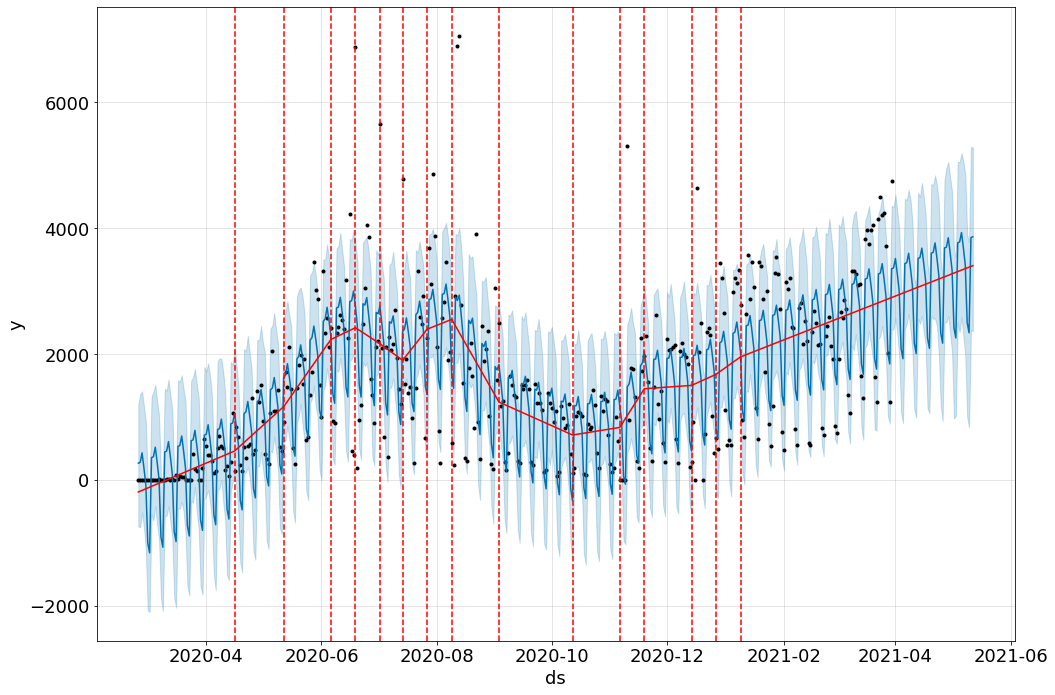

In [71]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [72]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=0.0005)

In [73]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [75]:
previsao = modelo.predict(dataframefuturo)

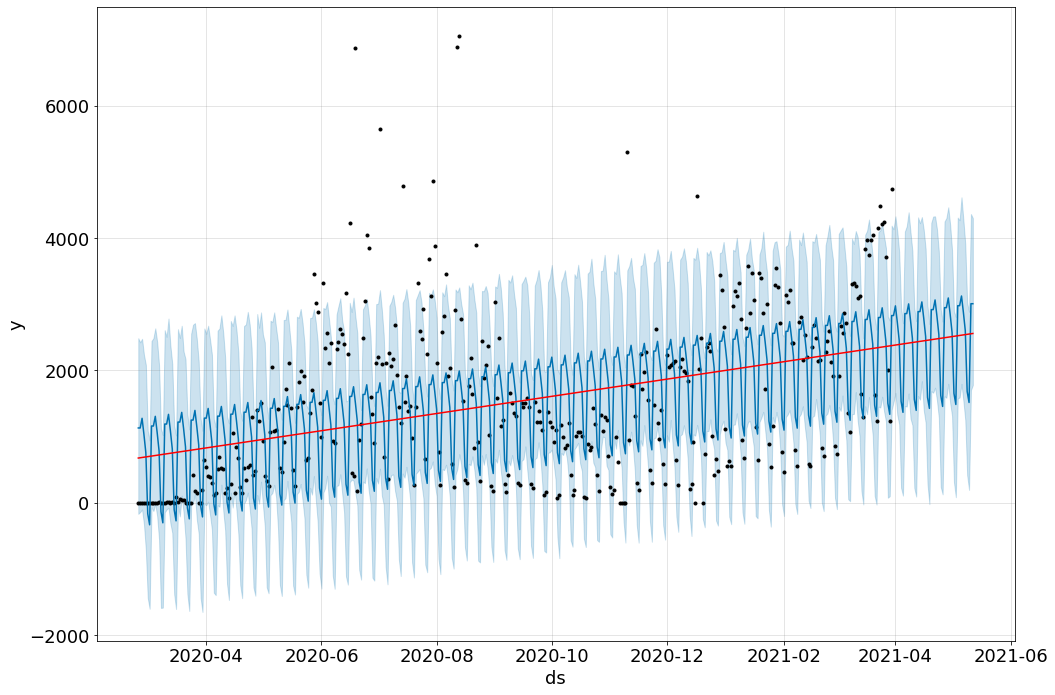

In [76]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [77]:
modelo = Prophet(changepoints=['2020-12-31'])

In [78]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [80]:
previsao = modelo.predict(dataframefuturo)

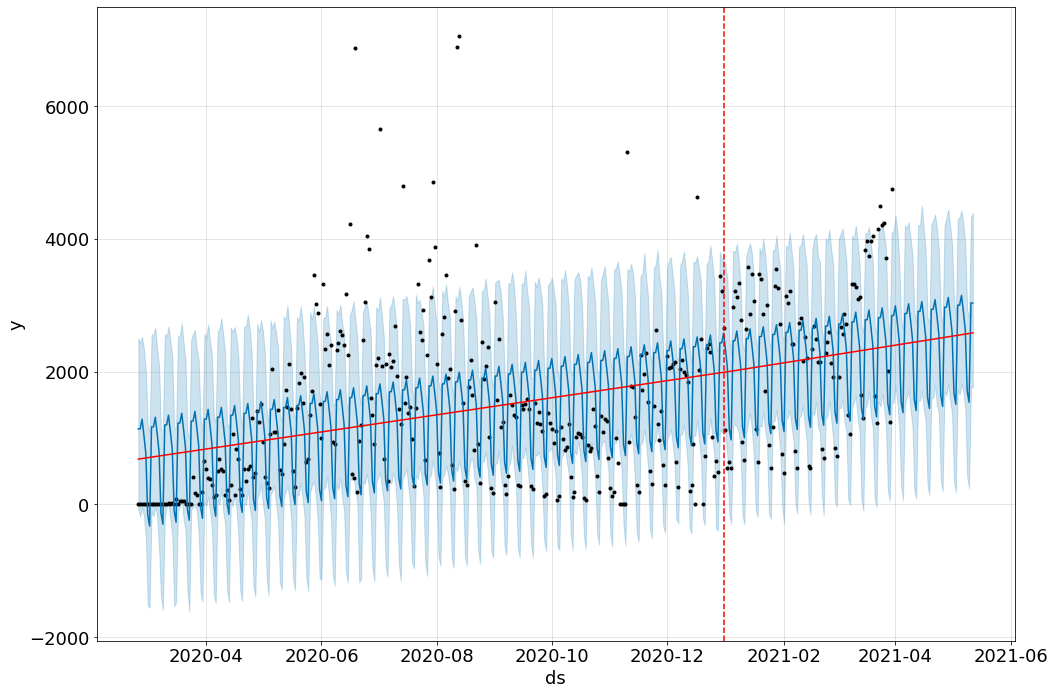

In [81]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

## Desafio 01: Fazer todo o processo de previsão para o número de dados acumulados.

## Desafio 02: Identificar potenciais changepoints

## Desafio 03: Desenvolver uma função roda o modelo 

#Aula 4.3


In [82]:
modelo = Prophet(changepoint_prior_scale=10)

In [83]:
modelo.add_country_holidays(country_name='BR')

In [84]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [86]:
previsao = modelo.predict(dataframefuturo)

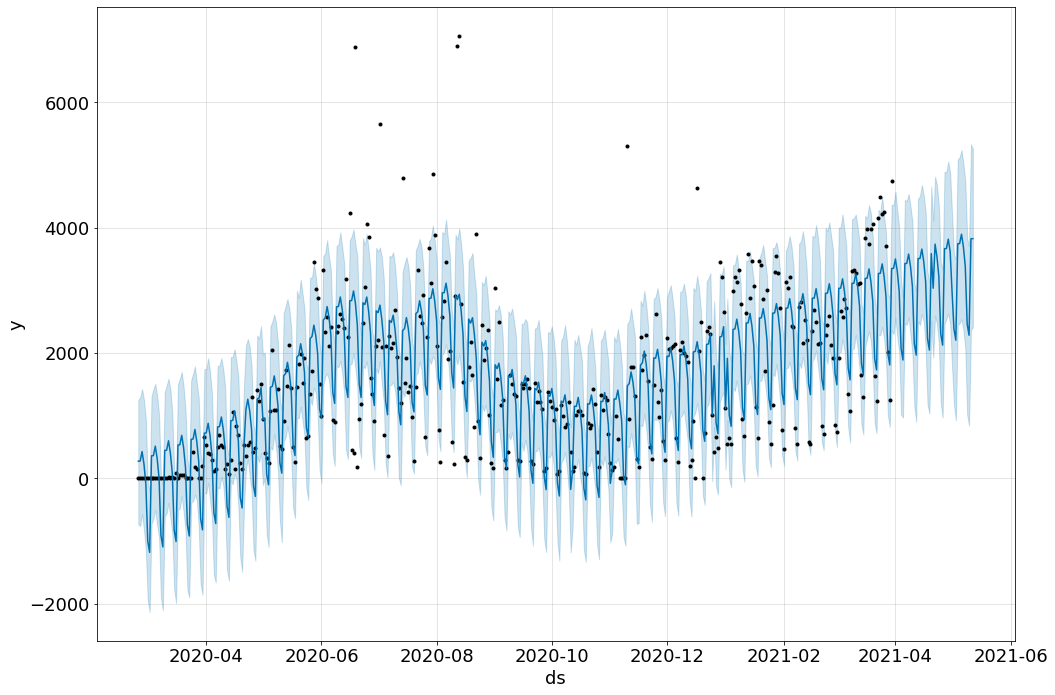

In [87]:
fig = modelo.plot(previsao, figsize=(15, 10))

In [88]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [89]:
feriados_sp_2020 = pd.DataFrame({'holiday': 'sp_2020', 'ds':pd.to_datetime(feriados_sp_2020)})

In [90]:
feriados_sp_2021 = pd.DataFrame({'holiday': 'sp_2021', 'ds':pd.to_datetime(feriados_sp_2021)})

In [91]:
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [92]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados)

In [93]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [95]:
previsao = modelo_feriados.predict(dataframefuturo)

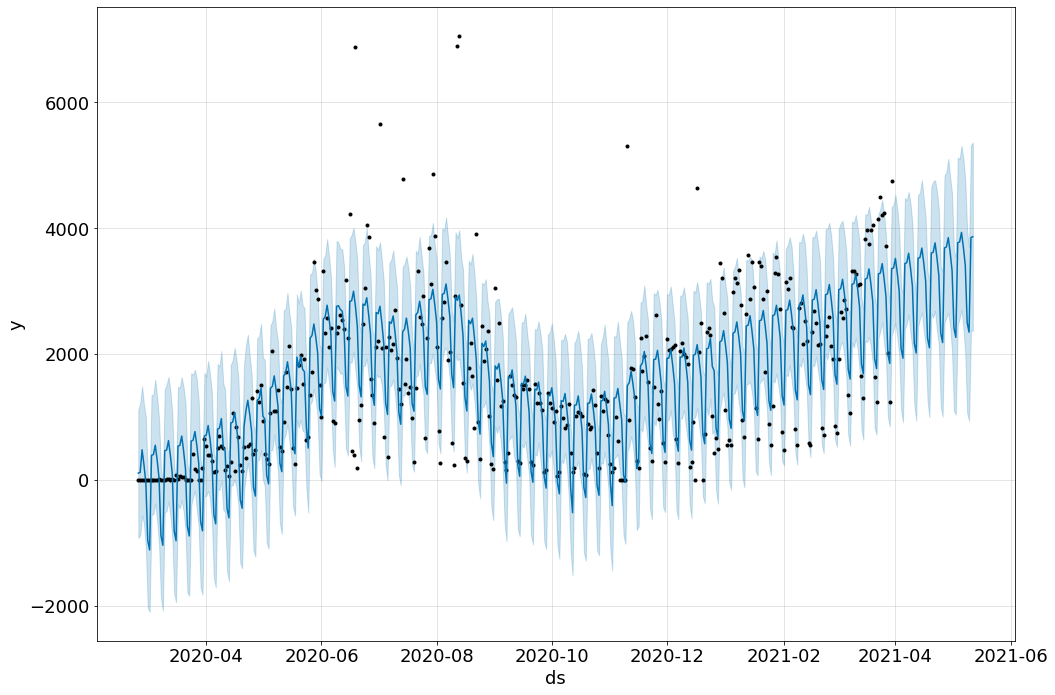

In [96]:
fig = modelo.plot(previsao, figsize=(15, 10))

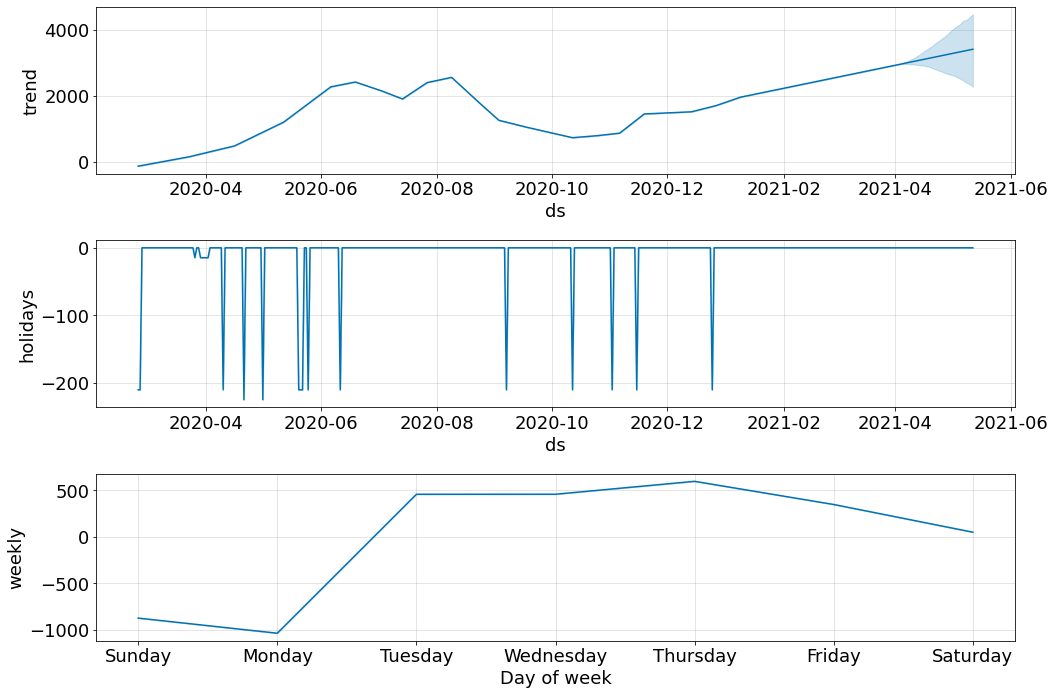

In [97]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [98]:
from sklearn.metrics import mean_absolute_error

In [99]:
# Sazonalidade aditiva
mean_absolute_error(df['y'], previsao['yhat'][:400])

538.0474179988163

In [100]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')

In [101]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [103]:
previsao = modelo_feriados.predict(dataframefuturo)

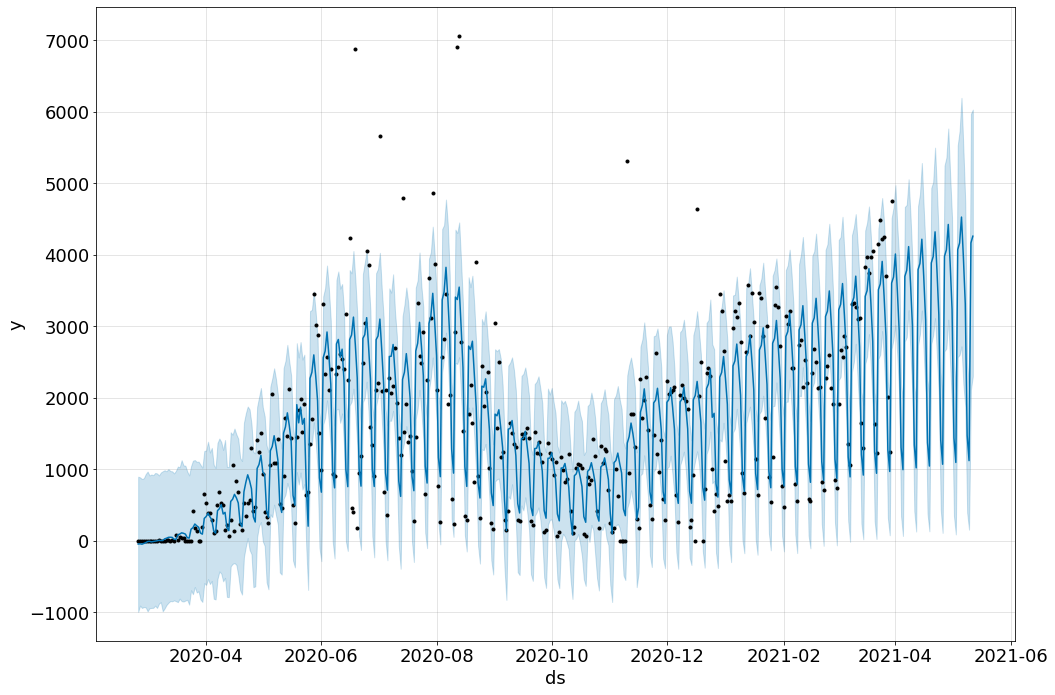

In [104]:
fig = modelo.plot(previsao, figsize=(15, 10))

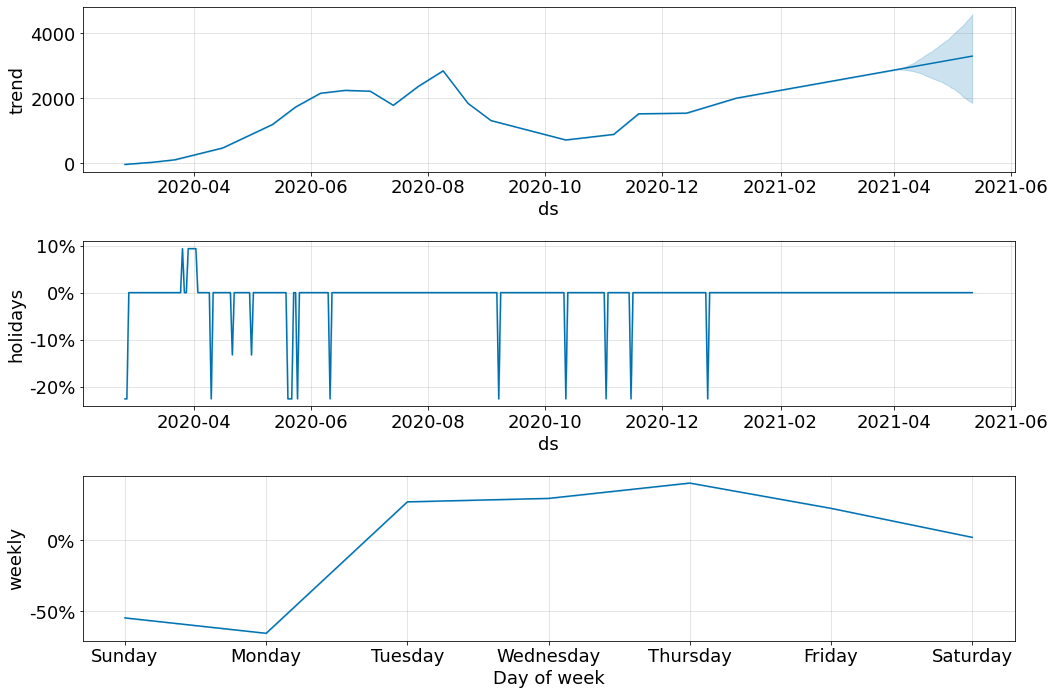

In [105]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [106]:
# Sazonalidade multiplicativa
mean_absolute_error(df['y'], previsao['yhat'][:400])

452.2884903942229

## Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.

# Aula 5.3

In [107]:
novo_y = df.reset_index()

In [108]:
novo_y

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242
399  257917 2021-03-30  4748

[400 rows x 3 columns]

In [109]:
sem_outliers = novo_y[(novo_y['y'] > previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]

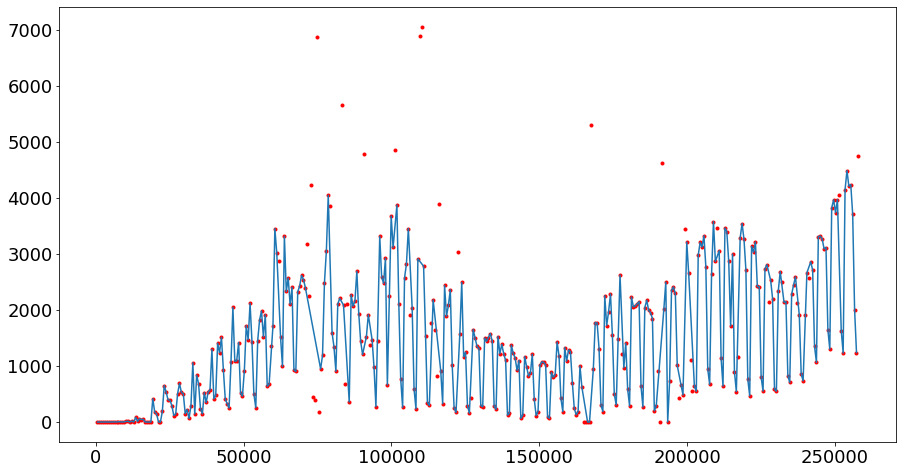

In [110]:
plt.plot(df.index, df['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [115]:
df_sem_outliers = sem_outliers[['ds', 'y']]

In [116]:
df_sem_outliers.head()

ds  y
0 2020-02-25  0
1 2020-02-26  0
2 2020-02-27  0
3 2020-02-28  1
4 2020-02-29  0

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


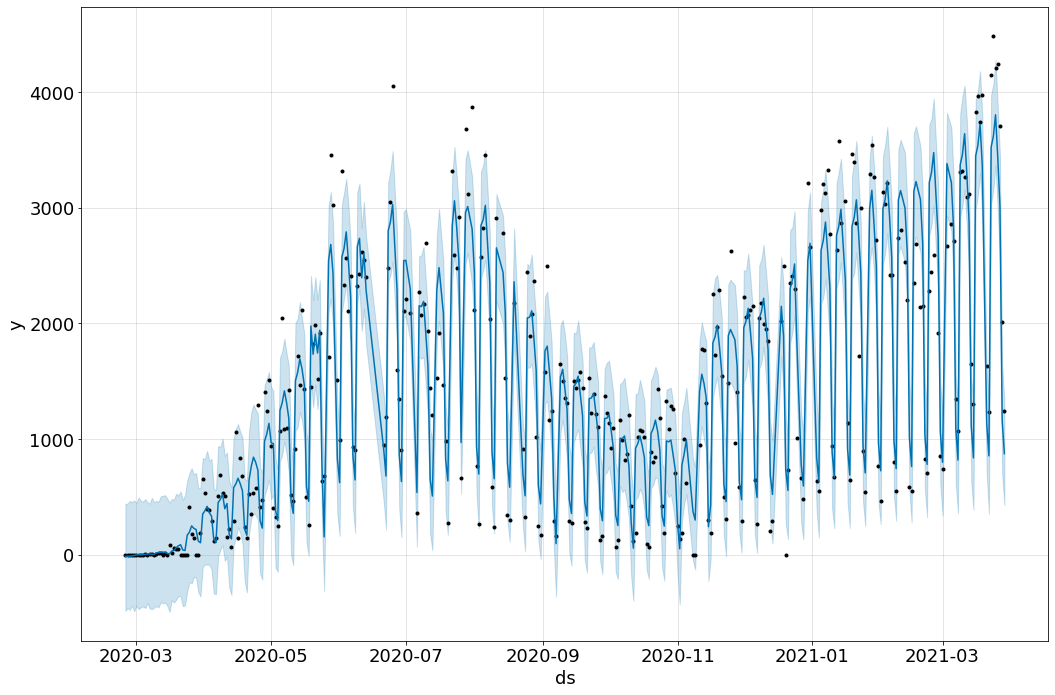

In [118]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=0)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


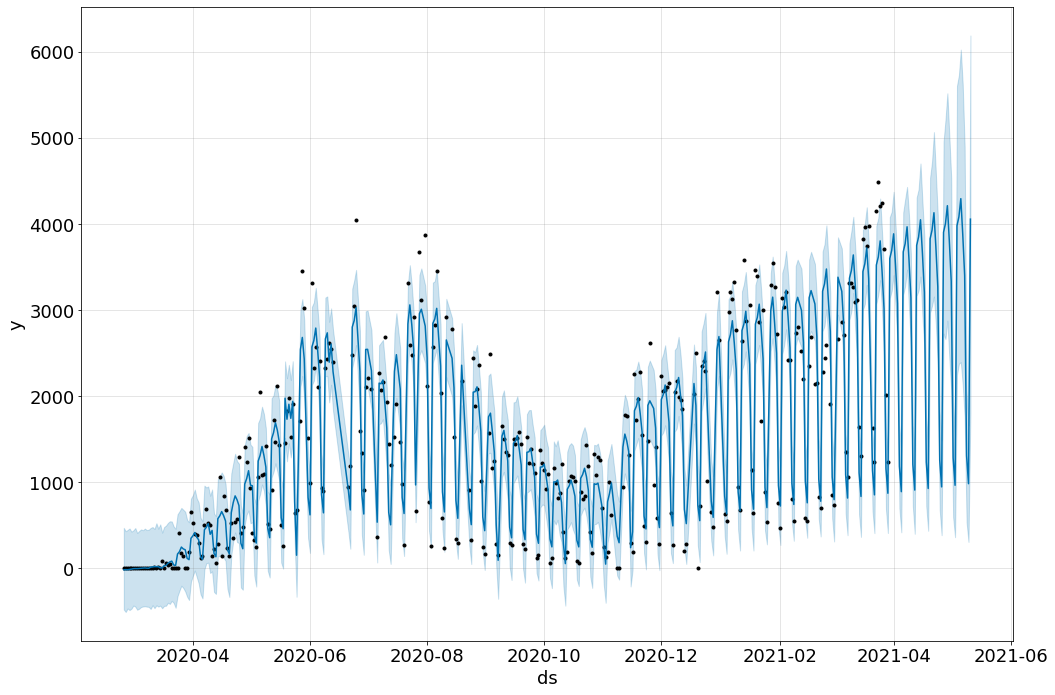

In [119]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

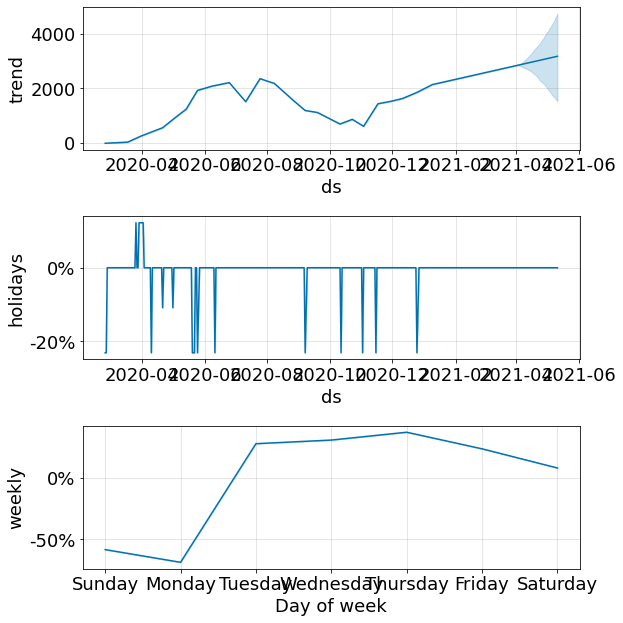

In [121]:
modelo_feriados.plot_components(previsao);

In [122]:
amostras = modelo_feriados.predictive_samples(previsao)

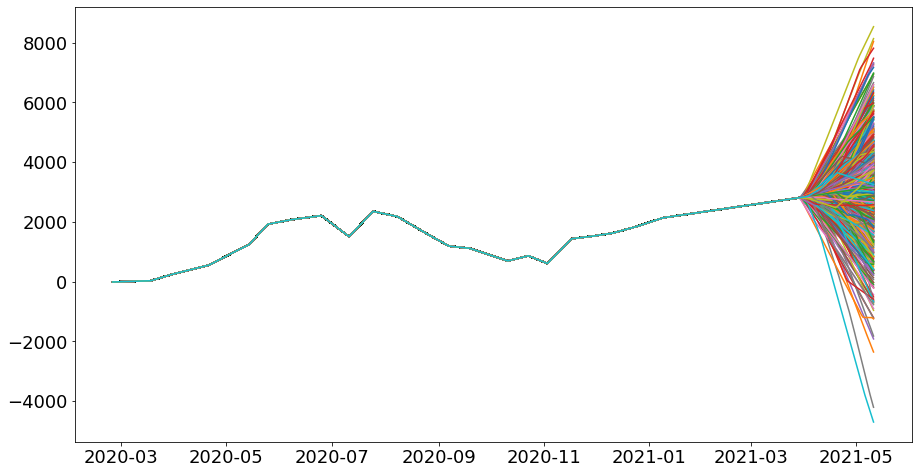

In [123]:
plt.plot(previsao['ds'], amostras['trend']);

## Desafio 01: Testar diferentes intervalos de confiança